In [8]:
# Retrieving Data
import pandas as pd  
import numpy as np
import requests
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from pprint import pprint

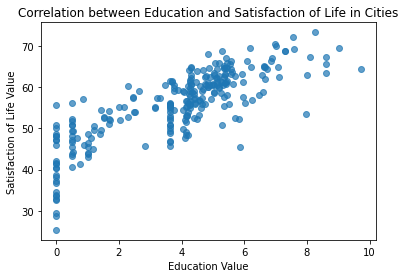

In [9]:
# URL used: https://api.teleport.org/api/urban_areas
# API Name: Teleport
# Research Question: Is there a correlation between Satisfaction of Life and Education?

response = requests.get('https://api.teleport.org/api/urban_areas')
#iterate through all cities to get satisfaction of life and other data

response.status_code
data = response.json()

city_list = [] #list of all cities
city_score = [] #list for all satisfaction scores of each city
edu_score = [] #list for all education scores of each city
for i in range(len(data['_links']['ua:item'])):
    city = data['_links']['ua:item'][i]['href']
    city_name = city[46:-1] #strips url to obtain solely the name of the city
    city_list.append(city_name) #adds to city list
for cities in city_list:
    #Go through the scores of each city in the list via the API
    city_response = requests.get('https://api.teleport.org/api/urban_areas/slug:'+ cities +'/scores/')
    city_data = city_response.json()
    sat_life = city_data['teleport_city_score'] #stores satisfaction value of each city
    city_score.append(sat_life) #adds to satisfaction list
    education = city_data['categories'][9]['score_out_of_10'] #stores education value of each city
    edu_score.append(education) #adds to education list
plt.scatter(edu_score, city_score, alpha = 0.7) #plots correlation of education and satisfaction of life
plt.title('Correlation between Education and Satisfaction of Life in Cities')
plt.ylabel('Satisfaction of Life Value')
plt.xlabel('Education Value')
plt.show()